Hello World of Machine Learning
The best small project to start with on a new tool is the classification of iris flowers (e.g. the iris dataset).

* Attributes are numeric so you have to figure out how to load and handle data.
* It is a classification problem, allowing you to practice with perhaps an easier type of supervised learning algorithm.
* It is a multi-class classification problem (multi-nominal) that may require some specialized handling.
* It only has 4 attributes and 150 rows, meaning it is small and easily fits into memory (and a screen or A4 page).
* All of the numeric attributes are in the same units and the same scale, not requiring any special scaling or transforms to get started.

To do
1.	Installing the Python and SciPy platform.
2.	Loading the dataset.
3.	Summarizing the dataset.

  *	Dimensions of the dataset.
  *	Peek at the data itself.
  *	Statistical summary of all attributes.
  *	Breakdown of the data by the class variable.


4.	Visualizing the dataset.

  *	Univariate plots to better understand each attribute.
  *	Multivariate plots to better understand the relationships between attributes.

5.	Evaluating some algorithms.

  *	Separate out a validation dataset.
  *	Set-up the test harness to use 10-fold cross validation.
  *	Build multiple different models to predict species from flower measurements
  *	Select the best model.
  * test 6 different algorithms:
          -	Logistic Regression (LR)
          -	Linear Discriminant Analysis (LDA)
          -	K-Nearest Neighbors (KNN).
          -	Classification and Regression Trees (CART).
          -	Gaussian Naive Bayes (NB).
          -	Support Vector Machines (SVM).

6.	Making some predictions.

# 2. Loading the dataset

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target


# 3. Summarizing the Dataset

In [ ]:
print(df.shape)


(150, 5)


In [ ]:
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [ ]:
print(df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [ ]:
print(df['species'].value_counts())


species
0    50
1    50
2    50
Name: count, dtype: int64


# 4. Visualizing the Dataset

* Univariate plots:


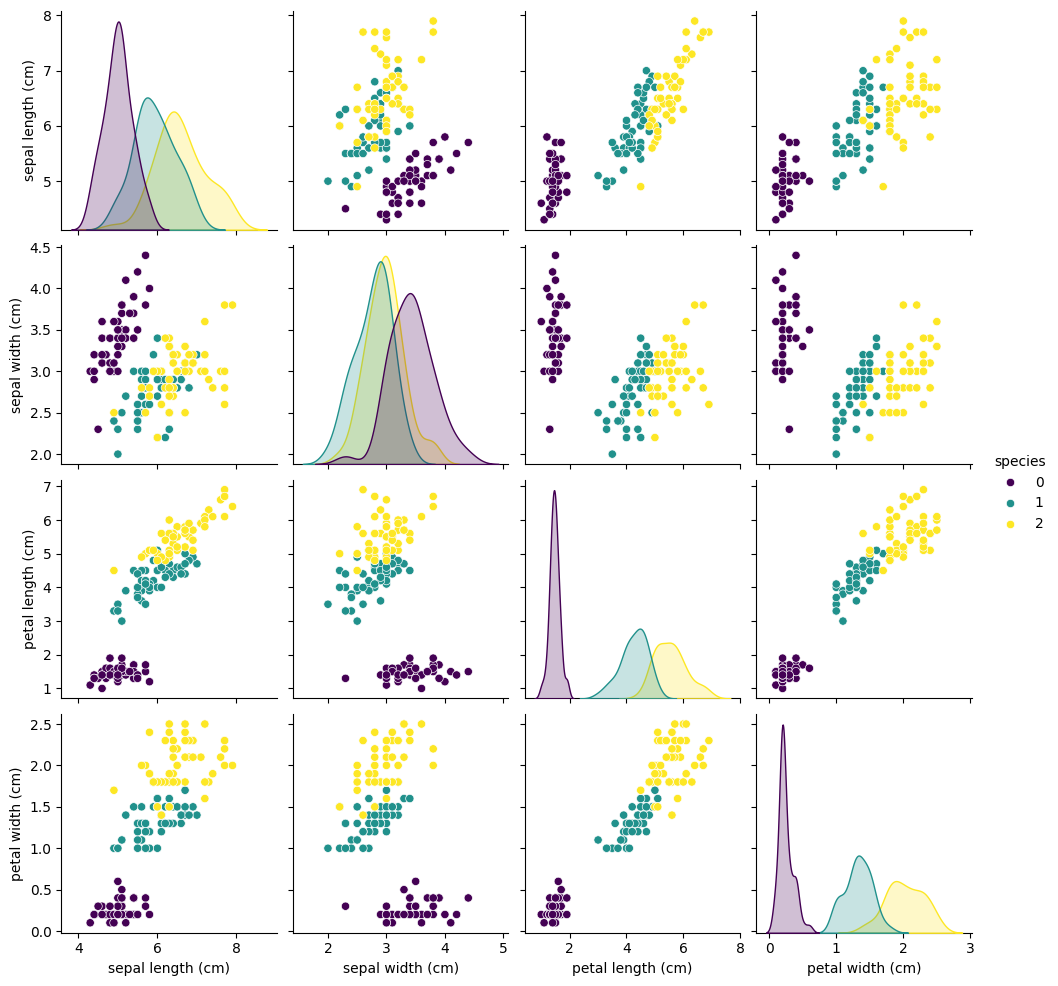

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for univariate analysis
sns.pairplot(df, hue='species', palette="viridis")
plt.show()


* Multivariate plots:


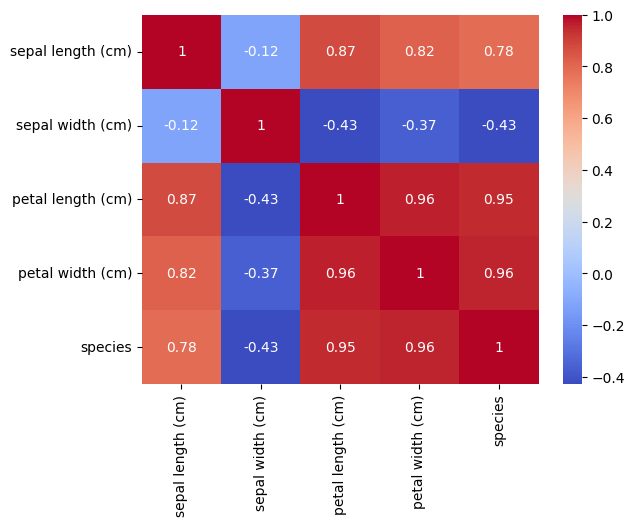

In [ ]:
# Heatmap for correlation analysis
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


# 5. Evaluating Some Algorithms


* Separate out a validation dataset:



In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


* Set-up the test harness to use 10-fold cross-validation:


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=42, shuffle=True)


* Build and evaluate models:


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.9500 (0.0667)
LDA: 0.9667 (0.0553)
KNN: 0.9500 (0.0667)
CART: 0.9250 (0.0786)
NB: 0.9417 (0.0750)
SVM: 0.9583 (0.0672)


* Select the best model based on accuracy:


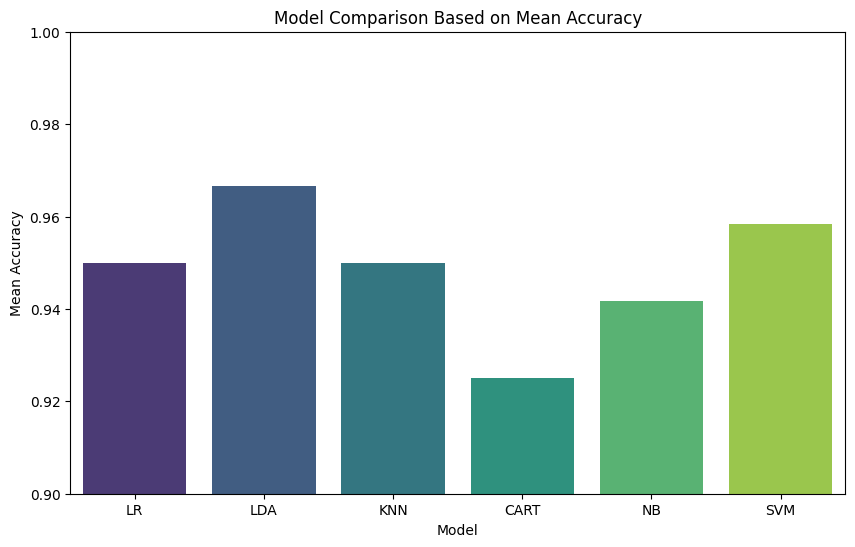

In [ ]:
# Plotting a bar chart for model comparison based on mean accuracy
import seaborn as sns

# Prepare data for bar chart
mean_accuracies = [result.mean() for result in results]
comparison_df = pd.DataFrame({
    'Model': names,
    'Mean Accuracy': mean_accuracies
})

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean Accuracy', data=comparison_df, palette='viridis', hue='Model')
plt.title('Model Comparison Based on Mean Accuracy')
plt.ylim(0.9, 1.0)
plt.show()

# 6. Making Some Predictions


In [ ]:
model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

